In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xgboost as xgb  # xgb stuff
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Importamos base de datos
from google.colab import files
uploaded = files.upload()

Saving Telecom Churn Rate Dataset.xlsx to Telecom Churn Rate Dataset.xlsx


In [ ]:
#Preprocesamiento de la Data

In [ ]:
dataset=pd.read_excel('/content/Telecom Churn Rate Dataset.xlsx')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [ ]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [ ]:
#Veamos valores unicos:
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
dataset["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#veamos de que forma se distribuye la variable target "churn"

In [ ]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#Veamos la tasa de pérdida de clientes:
dataset["Churn"].value_counts()*100/(len(dataset["Churn"]))

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
#La tasa de pérdida de usuarios es de 26.54%

In [ ]:
#Veamos la variable TotalCharges, cambiemos el tipo object al tipo float para una
#mayor comprensión
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset['TotalCharges']=dataset['TotalCharges'].astype("float")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Veamos si las columnas tienen valores nulos:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
numAdminTickets     False
numTechTickets      False
Churn               False
dtype: bool

In [ ]:
#Vemos que la variable TotalCharges tiene valores nulos, por ende, encontremos el promedio y complemtemos los valores restantes
valor_reemplazo=dataset['TotalCharges'].mean().round(5)
dataset['TotalCharges']=dataset['TotalCharges'].fillna(valor_reemplazo)

In [ ]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
numAdminTickets     False
numTechTickets      False
Churn               False
dtype: bool

In [ ]:
dataset.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
#Codificación binaria a todas las columnas con dos o menos valores:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab_enc=LabelEncoder() #objeto
contador=0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) == 2:
            dataset[col] = lab_enc.fit_transform(dataset[col])
            contador += 1
print('{} columnas estan codificadas'.format(contador))

6 columnas estan codificadas


In [ ]:
dataset.OnlineSecurity.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: OnlineSecurity
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [ ]:
dataset.Dependents.value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


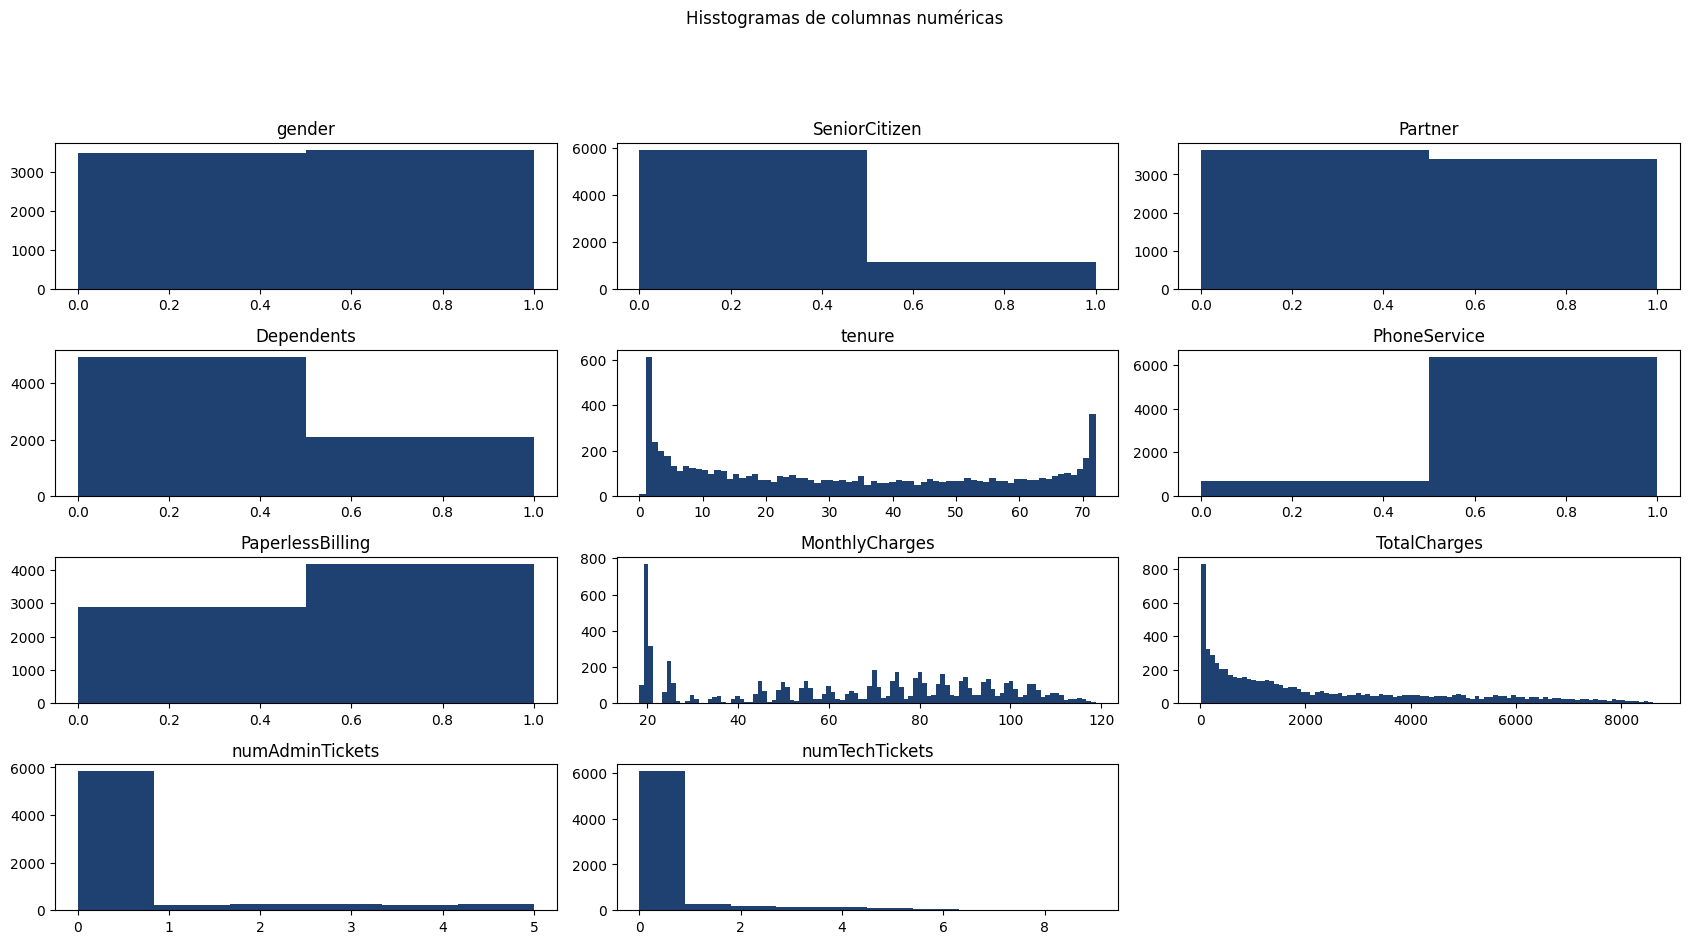

In [ ]:
#Análisis Exploratorio de Datos
#Ploteo de Histograma
import matplotlib.pyplot as plt
dataset2=dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges','numAdminTickets','numTechTickets']]
fig1=plt.figure(figsize=(17,14))
plt.suptitle('Hisstogramas de columnas numéricas\n',horizontalalignment="center")
for i in range(dataset2.shape[1]):
  plt.subplot(6, 3, i+1)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i])

  vals = np.size(dataset2.iloc[:, i].unique())
  if vals >= 100:
      vals = 100

  plt.hist(dataset2.iloc[:, i], bins=vals, color = '#1F4172')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

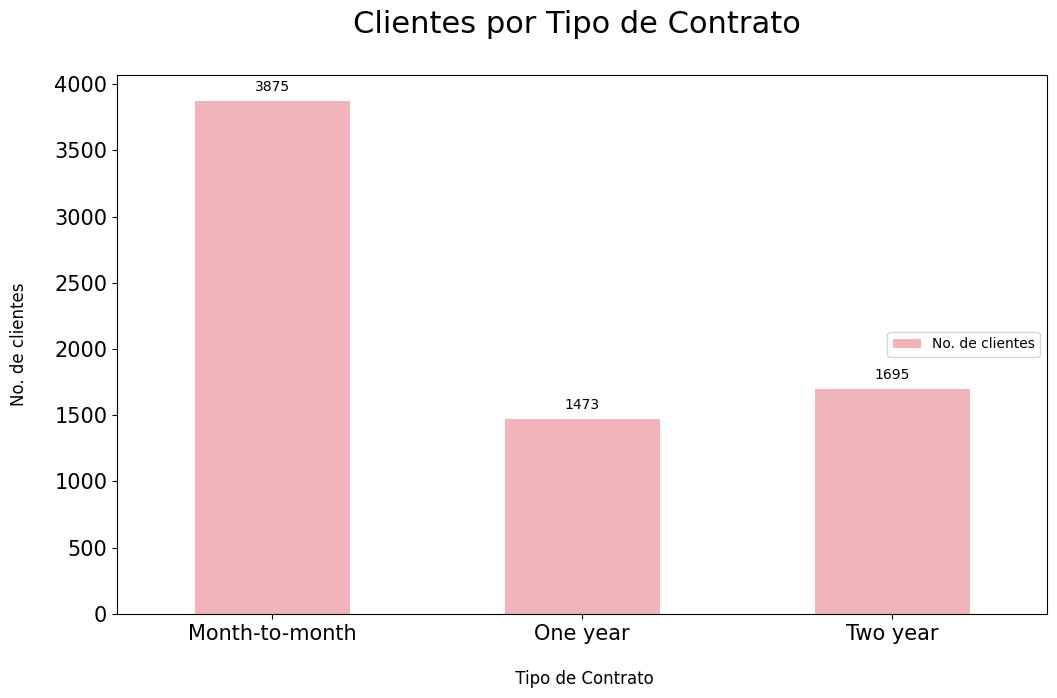

In [ ]:
#Analisis de la distribución de campos categóricos claves
#Tipo de contrato:
contract=dataset[["customerID","Contract"]]
sectors = contract.groupby ("Contract")
contract = pd.DataFrame(sectors["customerID"].count())
contract.rename(columns={'customerID':'No. de clientes'}, inplace=True)

ax =  contract[["No. de clientes"]].plot.bar(title = 'Clientes por Tipo de Contrato', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#F1B4BB', fontsize = 15, stacked=False)

plt.ylabel('No. de clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Tipo de Contrato',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Clientes por Tipo de Contrato \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract[["No. de clientes"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
add_value_labels(ax)

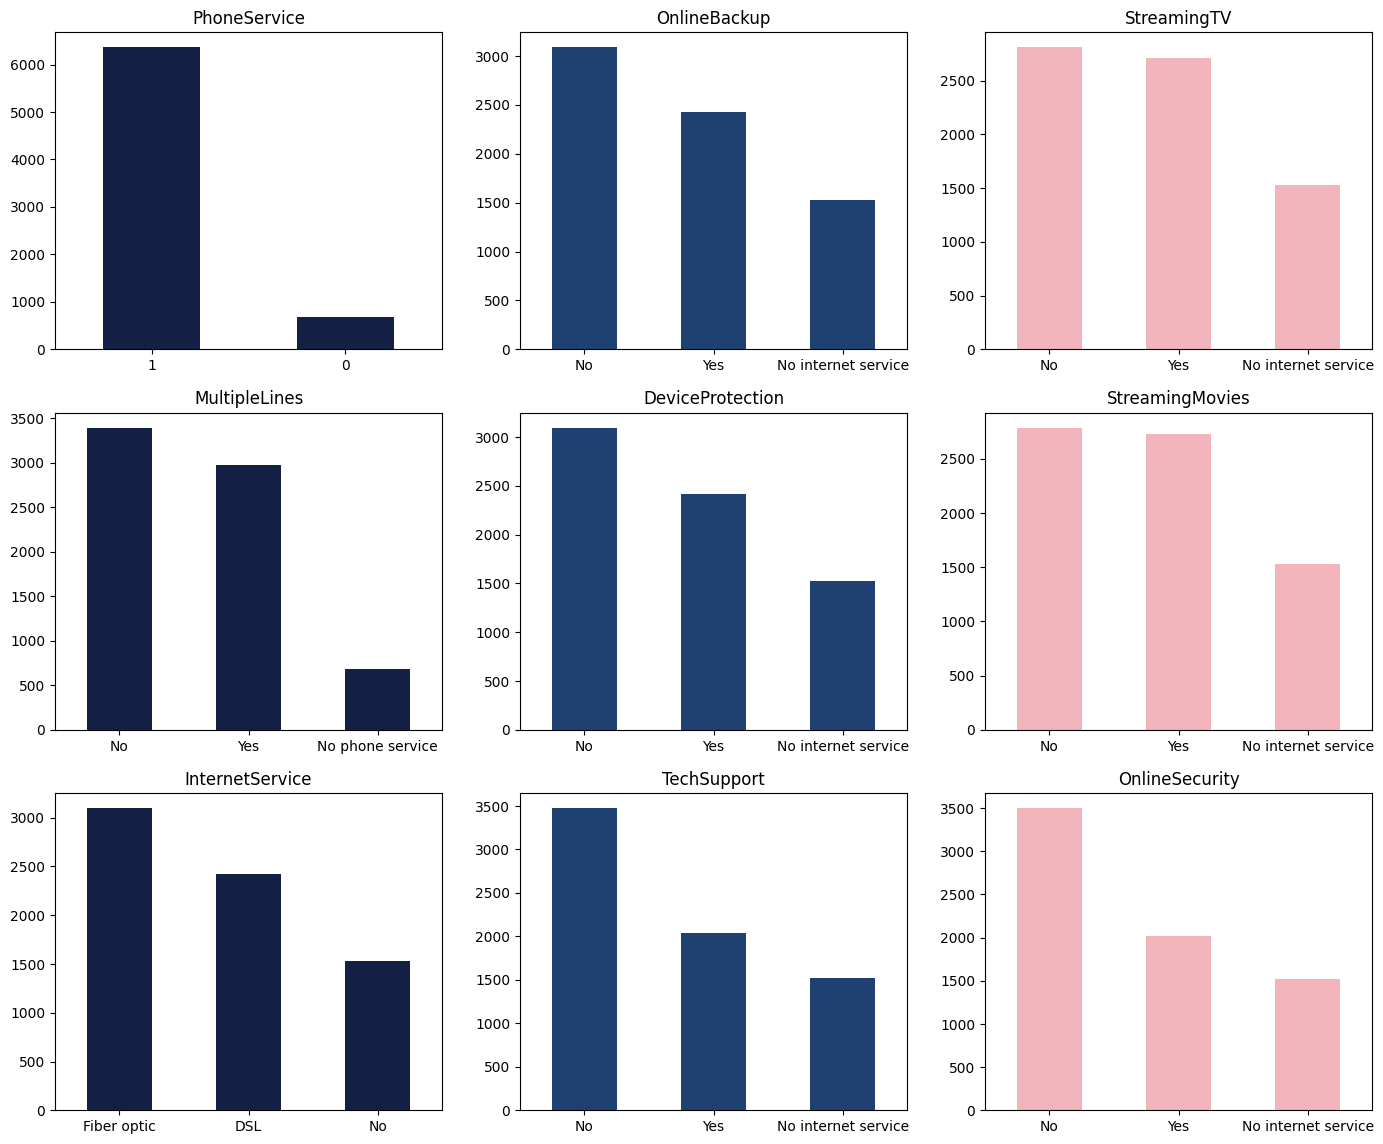

In [ ]:
#Distribucion de las variables categoricas codificadas:
services = ['PhoneService','MultipleLines','InternetService',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineSecurity']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (17,14))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#132043' )

    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#1F4172')

    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#F1B4BB')
    ax.set_title(item)

<ipython-input-22-3be39e73f6ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


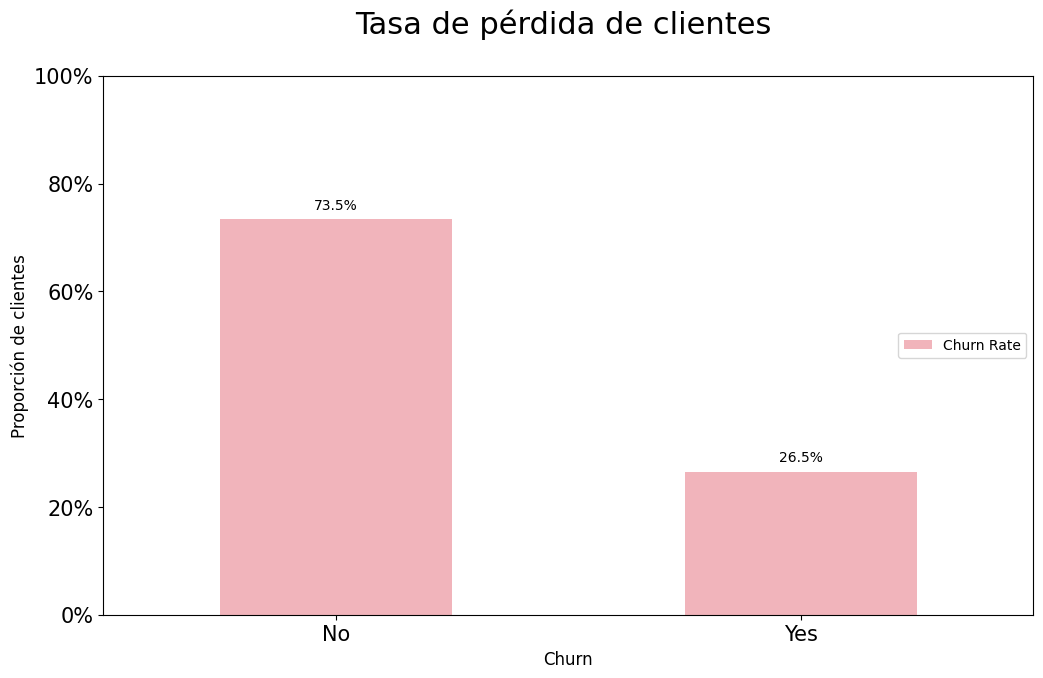

In [ ]:
# Analizamos la tasa de pérdida de clientes:
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color = '#F1B4BB', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proporción de clientes',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de pérdida de clientes \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

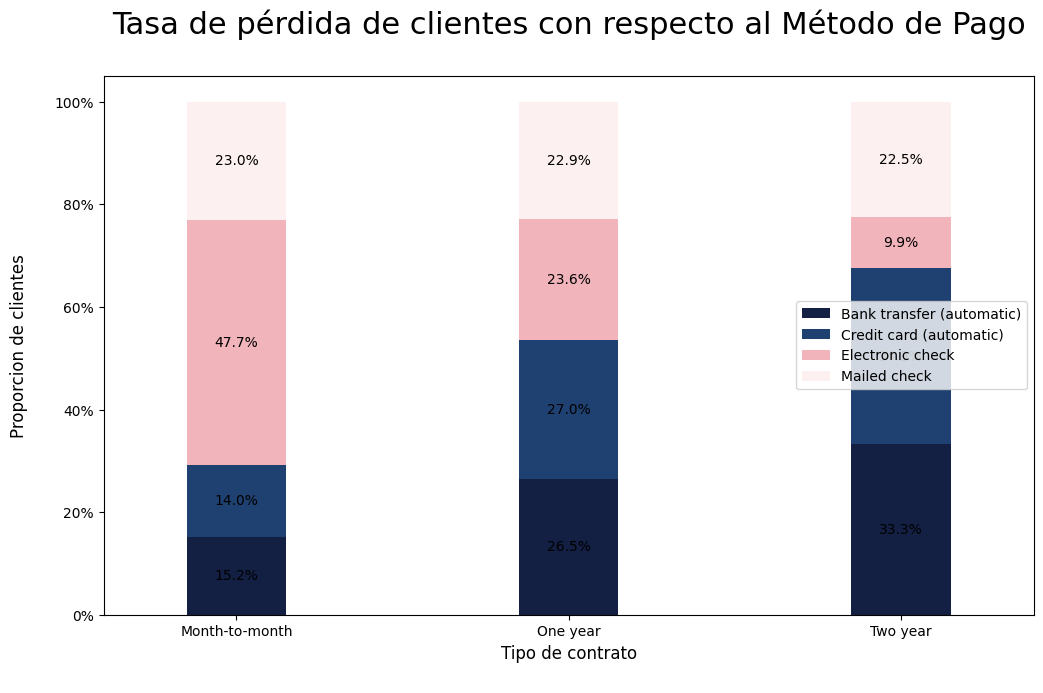

In [ ]:
import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#132043','#1F4172', '#F1B4BB' , '#FDF0F0']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proporcion de clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Tipo de contrato\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de pérdida de clientes con respecto al Método de Pago\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

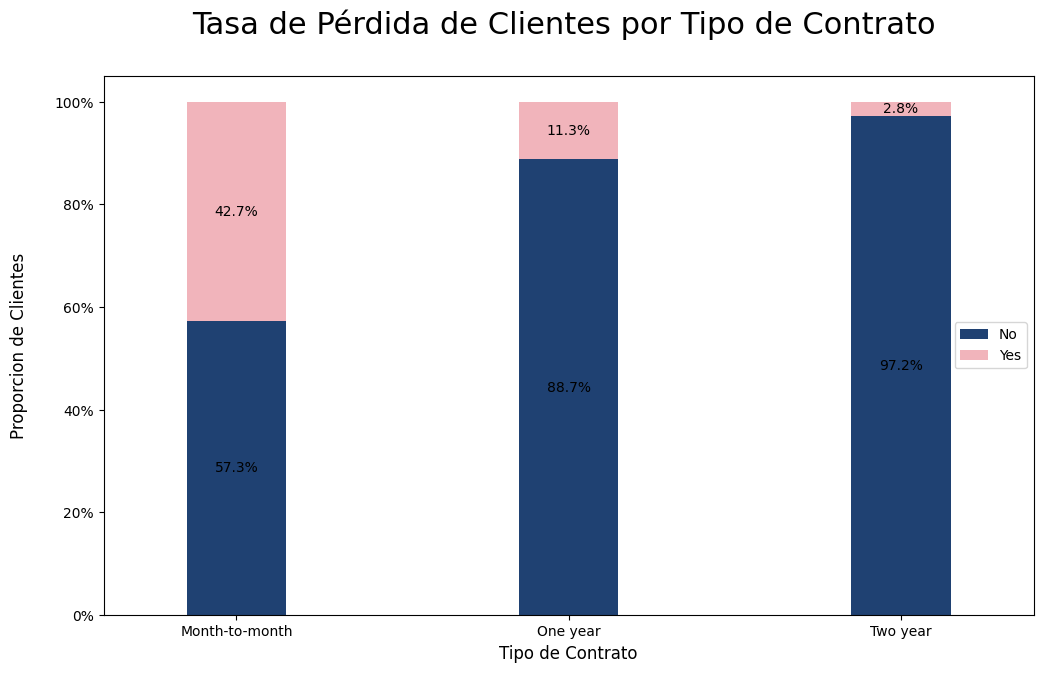

In [ ]:
import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#1F4172', '#F1B4BB']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3,stacked = True,rot = 0, figsize = (12,7),color = colors)
plt.ylabel('Proporcion de Clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Tipo de Contrato\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de Pérdida de Clientes por Tipo de Contrato \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

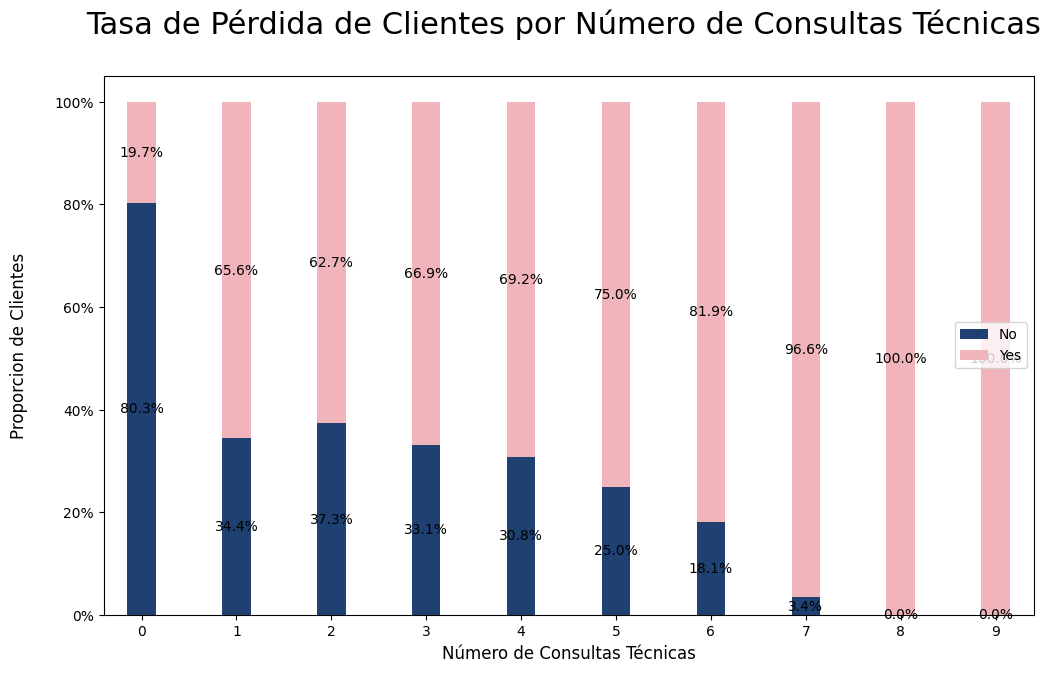

In [ ]:
import matplotlib.ticker as mtick

numtech_churn = dataset.groupby(['numTechTickets','Churn']).size().unstack()

numtech_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#1F4172', '#F1B4BB']

ax = (numtech_churn.T*100.0 / numtech_churn.T.sum()).T.plot(kind='bar', width = 0.3,stacked = True,rot = 0, figsize = (12,7),color = colors)
plt.ylabel('Proporcion de Clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Número de Consultas Técnicas\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de Pérdida de Clientes por Número de Consultas Técnicas \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

<ipython-input-27-e7a2d70e0129>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = dataset.corr().apply(lambda x: round(x,2))


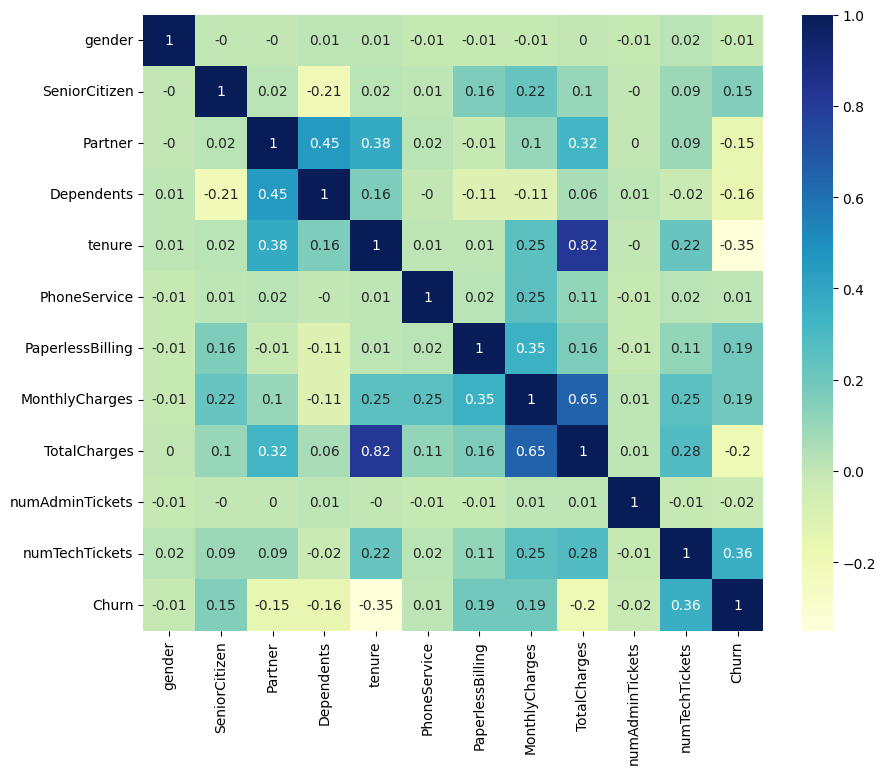

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_corr = dataset.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(dataset_corr,annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
#Notamos la correlación entre TotalCharges y Tenure. Ahora veamos la colinealidad de las variables:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculo_vif(X):
    # Factor de Inflación de la Varianza
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

dataset2=dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges','numAdminTickets','numTechTickets']]
calculo_vif(dataset2)

,variables,VIF
0,gender,1.922113
1,SeniorCitizen,1.329933
2,Partner,2.816119
3,Dependents,1.922801
4,tenure,10.580651
5,PhoneService,8.017266
6,PaperlessBilling,2.817676
7,MonthlyCharges,14.088648
8,TotalCharges,12.694766
9,numAdminTickets,1.153821


In [ ]:
#Del gráfico anterior y de la tabla VIF se concluye que debemos eliminar la columna "TotalCharges"
dataset2=dataset2.drop(columns="TotalCharges")
#Veamos:
calculo_vif(dataset2)

,variables,VIF
0,gender,1.880302
1,SeniorCitizen,1.324762
2,Partner,2.815338
3,Dependents,1.911120
4,tenure,3.355088
5,PhoneService,6.079096
6,PaperlessBilling,2.747593
7,MonthlyCharges,7.640577
8,numAdminTickets,1.150681
9,numTechTickets,1.217695


In [ ]:
#Eliminando la columna "TotalCharges" del dataset princcipal
dataset=dataset.drop(columns = "TotalCharges")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
#Creación de una nueva data para no alterar originalidad:
dataset_2=dataset
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
#Codificamos la data categorica
identidad=dataset_2["customerID"]
dataset_2=dataset_2.drop(columns="customerID")
#Conviertiendo el resto de columnas categoricas en dummy
dataset_2=pd.get_dummies(dataset_2)

In [ ]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   numAdminTickets                          7043 non-null   int64  
 9   numTechTickets                           7043 non-null   int64  
 10  Churn                                    7043 no

In [ ]:
#Eliminando columas en la data nueva para reducir dimensionalidad y no alterar la data originalidad
dataset_2=dataset_2.drop(columns='OnlineSecurity_No internet service')
dataset_2=dataset_2.drop(columns='OnlineBackup_No internet service')
dataset_2=dataset_2.drop(columns='DeviceProtection_No internet service')
dataset_2=dataset_2.drop(columns='TechSupport_No internet service')
dataset_2=dataset_2.drop(columns='StreamingTV_No internet service')
dataset_2=dataset_2.drop(columns='StreamingMovies_No internet service')

In [ ]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   numAdminTickets                          7043 non-null   int64  
 9   numTechTickets                           7043 non-null   int64  
 10  Churn                                    7043 no

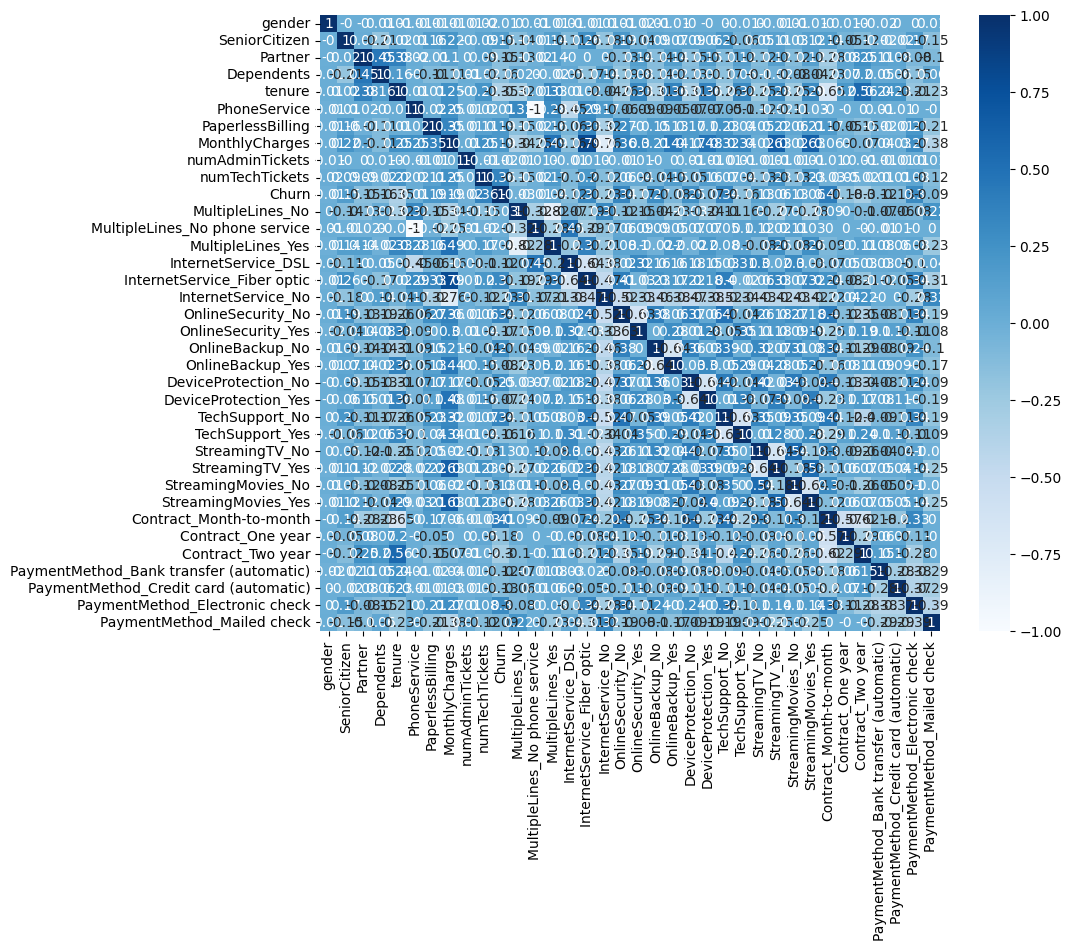

In [ ]:
#Verifiquemos la correlacion de todas las variables:
dataset_2_corr = dataset_2.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(dataset_2_corr,annot=True,cmap='Blues')
plt.show()

In [ ]:
#Separando el dataset en vectores X e y:
X = dataset_2.drop(columns='Churn')
y = dataset_2['Churn']

In [ ]:
#1. Separando el data set en TRAIN, VAL, TEST
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 30)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.2, stratify = y_trainval, random_state = 30)

In [ ]:
print(y_train.count()/y.count(),y_val.count()/y.count(),y_test.count()/y.count())
print(y_train.count(),y_val.count(),y_test.count())

0.6399261678262104 0.16001703819395144 0.20005679397983814
4507 1127 1409


In [ ]:
#Separamos los datos, Entrenamiento = 64%, Validacion=16%, Test=25%

In [ ]:
#Escalamiento e variables:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Notar que el scaler se fitea solo sobre el set de entrenamiento
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val_sc = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,numAdminTickets,numTechTickets,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1624,0,0,1,0,56,1,1,98.25,0,5,...,1,0,1,0,1,0,0,0,1,0
2261,0,0,1,0,49,1,1,52.15,0,0,...,0,1,0,1,0,0,0,1,0,0
6388,0,0,0,0,1,1,0,20.40,0,0,...,0,0,0,1,0,0,0,0,0,1
6865,0,0,1,0,8,1,0,65.50,0,0,...,0,0,1,0,0,1,0,0,0,1
6466,1,0,0,0,18,1,0,74.15,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
X_train_sc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,numAdminTickets,numTechTickets,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.777778,1.0,1.0,0.795409,0.0,0.625,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.680556,1.0,1.0,0.335329,0.0,0.000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.013889,1.0,0.0,0.018463,0.0,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.111111,1.0,0.0,0.468563,0.0,0.000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.250000,1.0,0.0,0.554890,0.0,0.000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Entrenamiento de 3 modelos:
#LOGÍSTICO:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
#ARBOLES DE DECISIÓN:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [ ]:
#NAIVE BAYES:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_sc,y_train)

GaussianNB()

In [ ]:
#Verificacion de los modelos según metricas: Precision, Recall y

In [ ]:
from sklearn.metrics import precision_score
print(f'Precision - Naive Bayes {precision_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Precision - Decision Tree: {precision_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Precision - Logistic Regression: {precision_score(y_val, lr.predict(X_val_sc)):.4f}')

Precision - Naive Bayes 0.5237
Precision - Decision Tree: 0.6254
Precision - Logistic Regression: 0.7431


In [ ]:
from sklearn.metrics import recall_score
print(f'Recall - Naive Bayes {recall_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Recall - Decision Tree: {recall_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Recall - Logistic Regression: {recall_score(y_val, lr.predict(X_val_sc)):.4f}')

Recall - Naive Bayes 0.8495
Recall - Decision Tree: 0.6421
Recall - Logistic Regression: 0.7157


In [ ]:
from sklearn.metrics import roc_auc_score
print(f'AUC - Naive Bayes {roc_auc_score(y_val, nb.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'AUC - Decision Tree: {roc_auc_score(y_val, dt.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'AUC - Logistic Regression: {roc_auc_score(y_val, lr.predict_proba(X_val_sc)[:,1]):.4f}')

AUC - Naive Bayes 0.8748
AUC - Decision Tree: 0.7528
AUC - Logistic Regression: 0.9215


In [ ]:

#Desarrollando la Matriz de confusion de los modelos:
#Definamos la función:
def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
  plt.xlabel('Predicción')
  plt.ylabel('Real')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()

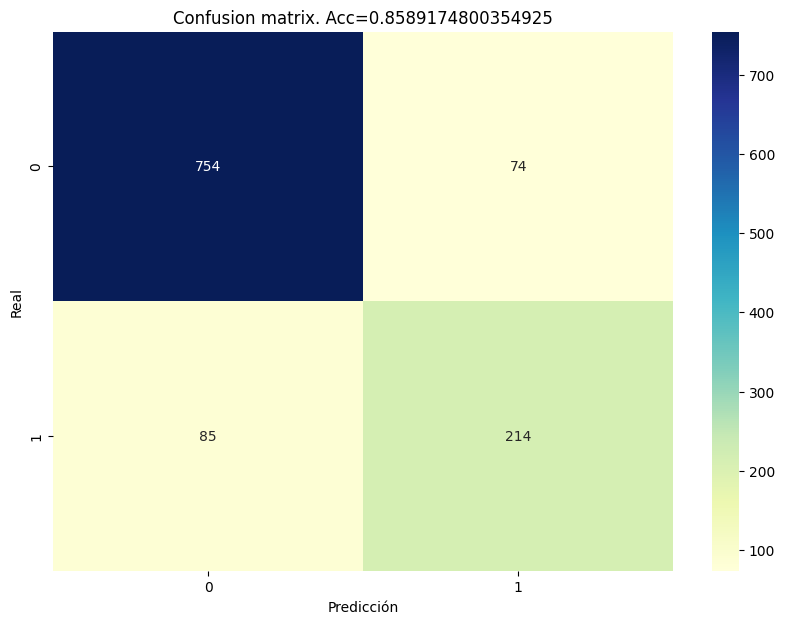

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print_confusion_matrix(confusion_matrix(y_val,lr.predict(X_val_sc)), accuracy_score(y_val,lr.predict(X_val_sc)))

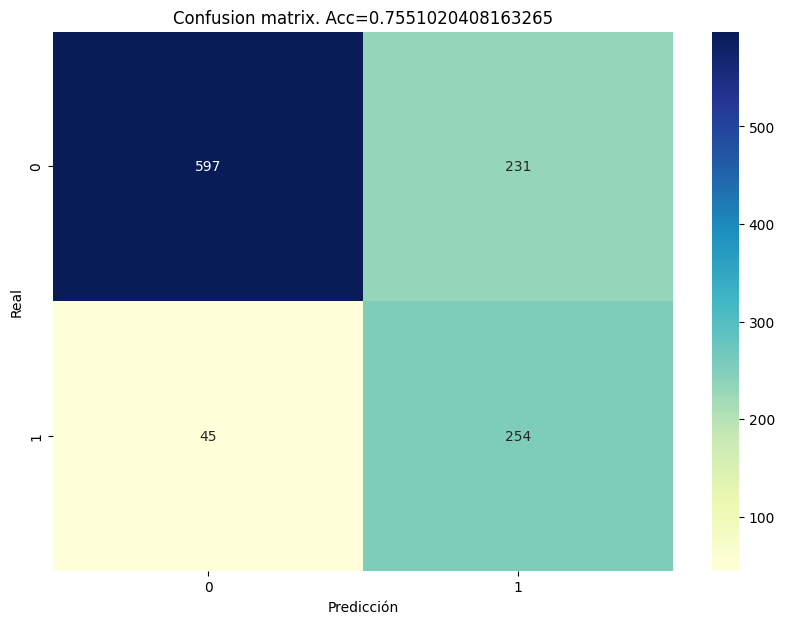

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print_confusion_matrix(confusion_matrix(y_val,nb.predict(X_val_sc)), accuracy_score(y_val,nb.predict(X_val_sc)))

In [ ]:
#Validación cruzada:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression(solver='liblinear'))])
pipeline_dt = Pipeline([('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])

In [ ]:
pipeline_nb = Pipeline([('scaler', MinMaxScaler()),('nb', GaussianNB())])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5)

array([0.91521254, 0.92209337, 0.91997883, 0.93289629, 0.92776001])

In [ ]:
from sklearn.model_selection import cross_val_score

lr_cross_precision = cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'precision', cv = 5).mean()
dt_cross_precision = cross_val_score(pipeline_dt, X_trainval, y_trainval, scoring = 'precision', cv = 5).mean()
nb_cross_precision = cross_val_score(pipeline_nb, X_trainval, y_trainval, scoring = 'precision', cv = 5).mean()

print(f'Precision - Logistic Regression: {lr_cross_precision:.4f}')
print(f'Precision - Decision Tree: {dt_cross_precision:.4f}')
print(f'Precision - Naive Bayes: {nb_cross_precision:.4f}')

print('')

lr_cross_recall = cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'recall', cv = 5).mean()
dt_cross_recall = cross_val_score(pipeline_dt, X_trainval, y_trainval, scoring = 'recall', cv = 5).mean()
nb_cross_recall = cross_val_score(pipeline_nb, X_trainval, y_trainval, scoring = 'recall', cv = 5).mean()

print(f'Recall - Logistic Regression: {lr_cross_recall:.4f}')
print(f'Recall - Decision Tree: {dt_cross_recall:.4f}')
print(f'Recall - Naive Bayes: {nb_cross_recall:.4f}')

print('')

lr_cross_auc = cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5).mean()
dt_cross_auc = cross_val_score(pipeline_dt, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5).mean()
nb_cross_auc = cross_val_score(pipeline_nb, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5).mean()

print(f'AUC - Logistic Regression: {lr_cross_auc:.4f}')
print(f'AUC - Decision Tree: {dt_cross_auc:.4f}')
print(f'AUC - Naive Bayes: {nb_cross_auc:.4f}')

Precision - Logistic Regression: 0.7512
Precision - Decision Tree: 0.6510
Precision - Naive Bayes: 0.5478

Recall - Logistic Regression: 0.7104
Recall - Decision Tree: 0.6515
Recall - Naive Bayes: 0.8562

AUC - Logistic Regression: 0.9236
AUC - Decision Tree: 0.7677
AUC - Naive Bayes: 0.8847


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-11, 1e-9, 1e-7]}  # Definir diferentes valores para var_smoothing

grid_clf = GridSearchCV(nb, param_grid, scoring='recall',cv=5)
grid_clf.fit(X_train, y_train)

best_params = grid_clf.best_params_


In [ ]:
best_params

{'var_smoothing': 1e-11}

In [ ]:
grid_clf.best_score_

0.8578591352859135

In [ ]:
# Código obtenido de la documentación de sklearn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'recall')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

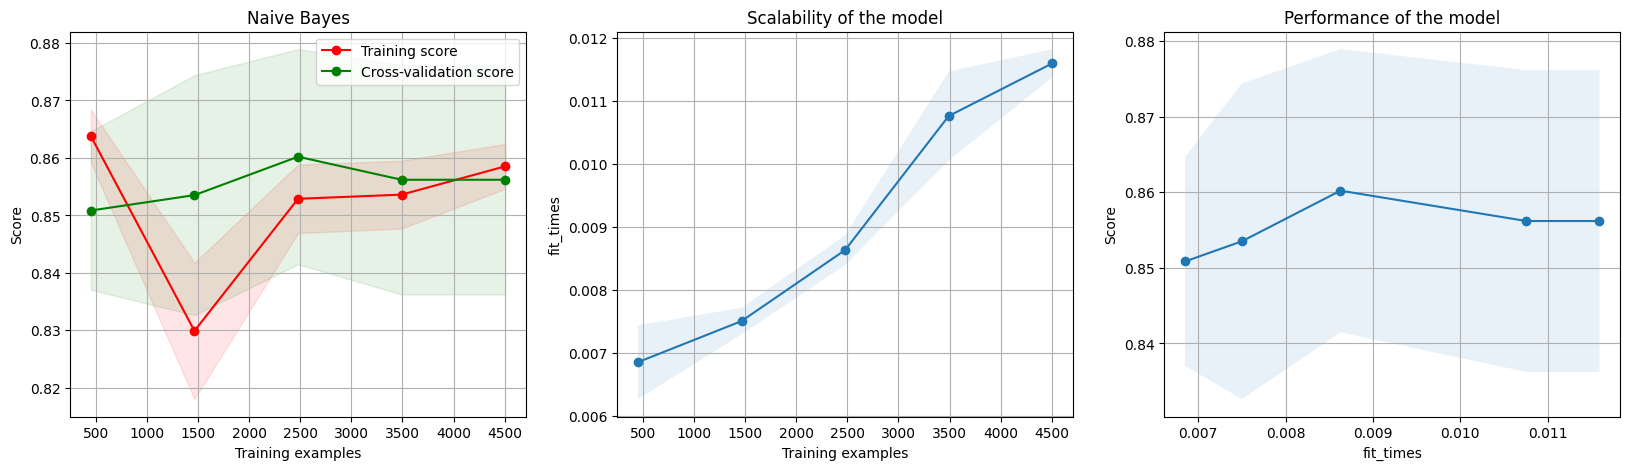

In [ ]:
estimator = Pipeline([('scaler', MinMaxScaler()),
                      ('clf', GaussianNB(var_smoothing= 1e-11))])
plot_learning_curve(estimator, 'Naive Bayes', X_trainval, y_trainval, cv=5)
plt.show()

In [ ]:
# Entrenamos el scaler con toda la data de entrenamiento
scaler = MinMaxScaler()
scaler.fit(X_trainval)
X_trainval_sc = scaler.transform(X_trainval)
X_test_sc = scaler.transform(X_test)

# Entrenamos el clasificador con toda la data de entrenamiento
clf_final = GaussianNB(var_smoothing= 1e-7)
clf_final.fit(X_trainval_sc, y_trainval)

y_pred = clf_final.predict(X_test_sc)
y_pred_proba = clf_final.predict_proba(X_test_sc)[:,1]

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred_proba)}')

Precision: 0.5262267343485617
Recall: 0.8315508021390374
AUC: 0.8654395618589993


In [ ]:
from sklearn.metrics import precision_score

print(f'Recall - Naive Bayes {recall_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Recall - Decision Tree: {recall_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Recall - Logistic Regression: {recall_score(y_val, lr.predict(X_val_sc)):.4f}')

Recall - Naive Bayes 0.8495
Recall - Decision Tree: 0.6421
Recall - Logistic Regression: 0.7157


In [ ]:
class_weight_lst = [None, 'balanced']
C_lst = [10, 1, 0.1, 0.01]

param_grid = {
    # El nombre del parametro sigue el patron: <nombre_paso_pipeline>__<nombre_parametros_documentacion>
    'lr__class_weight': class_weight_lst,
    'lr__C': C_lst
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(pipeline_lr, param_grid = param_grid, scoring = 'recall', cv = 5)
grid_clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'lr__C': [10, 1, 0.1, 0.01],
                         'lr__class_weight': [None, 'balanced']},
             scoring='recall')

In [ ]:
grid_clf.best_params_

{'lr__C': 1, 'lr__class_weight': 'balanced'}

In [ ]:
grid_clf.best_score_

0.8729044630404463

In [ ]:
# Código obtenido de la documentación de sklearn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

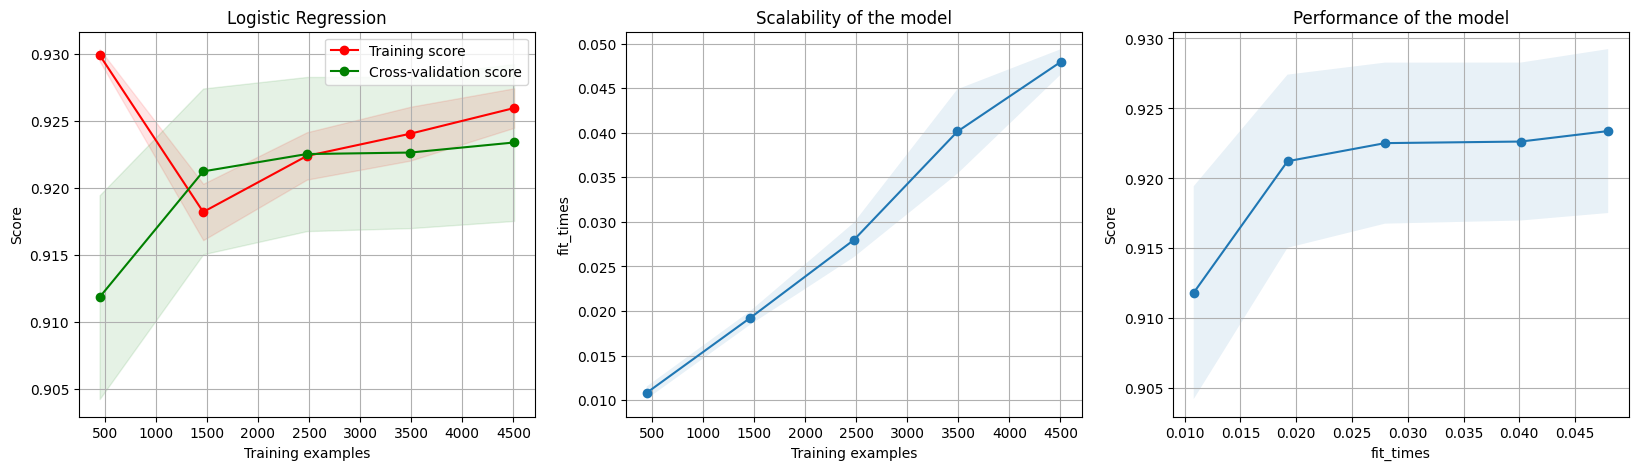

In [ ]:
estimator = Pipeline([('scaler', MinMaxScaler()),
                      ('clf', LogisticRegression(solver = 'liblinear', C=10, class_weight='balanced'))])
plot_learning_curve(estimator, 'Logistic Regression', X_trainval, y_trainval, cv=5)
plt.show()

In [ ]:
# Entrenamos el scaler con toda la data de entrenamiento
scaler = MinMaxScaler()
scaler.fit(X_trainval)
X_trainval_sc = scaler.transform(X_trainval)
X_test_sc = scaler.transform(X_test)

# Entrenamos el clasificador con toda la data de entrenamiento
clf_final = LogisticRegression(solver = 'liblinear', C=10, class_weight = 'balanced')
clf_final.fit(X_trainval_sc, y_trainval)

y_pred = clf_final.predict(X_test_sc)
y_pred_proba = clf_final.predict_proba(X_test_sc)[:,1]

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred_proba)}')

Precision: 0.618595825426945
Recall: 0.8716577540106952
AUC: 0.9144643364592214


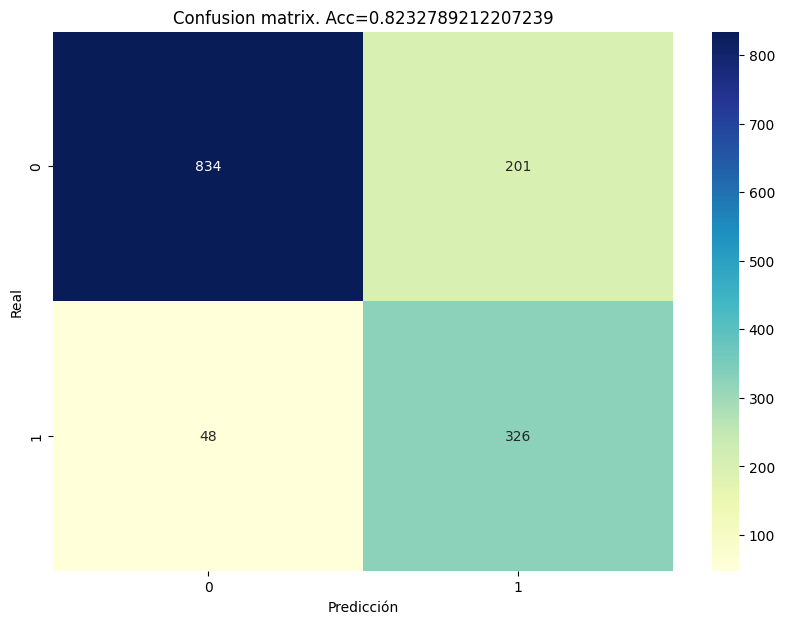

In [ ]:
print_confusion_matrix(confusion_matrix(y_test,clf_final.predict(X_test_sc)), accuracy_score(y_test,clf_final.predict(X_test_sc)))

Text(0.5, 1.0, 'Importancia de variables para el clasificador')

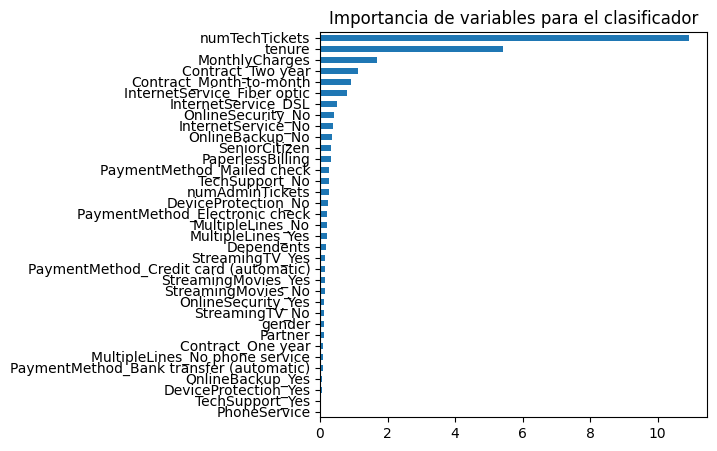

In [ ]:
plt.figure(figsize=(5,5))
# Para metodos lineales, como Regresion Logistica, usamos clf.coef_.
# Otros metodos -como arboles- tienen el atributo feature_importances_
df_importancias = pd.DataFrame.from_dict({x:abs(y) for x,y in zip(X_trainval.columns,clf_final.coef_[0])}, orient='index', columns=['Importancia'])
df_importancias = df_importancias.sort_values(by='Importancia', ascending=True)
df_importancias.Importancia.plot(kind='barh')
plt.title('Importancia de variables para el clasificador')

In [ ]:
base_scoreada = X_test.copy(deep=True)
base_scoreada['PROB'] = y_pred_proba
base_scoreada['GRUPO'] = pd.qcut(base_scoreada['PROB'], 5, labels=['Muy Baja','Baja','Media','Alta','Muy Alta'])
base_scoreada['CONTADOR'] = 1
base_scoreada['CHURN'] = y_test

In [ ]:
base_scoreada.groupby('GRUPO')['PROB'].describe()

,count,mean,std,min,25%,50%,75%,max
GRUPO,,,,,,,,
Muy Baja,282.0,0.002479,0.002060,0.000152,0.000868,0.001728,0.003721,0.008116
Baja,282.0,0.044452,0.027633,0.008236,0.020682,0.039150,0.065534,0.109335
Media,281.0,0.274342,0.105122,0.110104,0.181180,0.265977,0.371770,0.446366
Alta,282.0,0.631824,0.102900,0.447386,0.547821,0.632904,0.720973,0.800294
Muy Alta,282.0,0.903713,0.055256,0.801613,0.856030,0.904525,0.945638,0.999753


In [ ]:
pivot = pd.pivot_table(base_scoreada, values='CONTADOR', index='GRUPO', columns='CHURN', aggfunc=np.sum).fillna(0)

# Recordar 0=No Churn, 1=Churn
pivot.columns = ['No_churn','Churn']
pivot['Total'] = pivot['Churn'] + pivot['No_churn']
pivot['Pct'] = pivot['Churn']/pivot['Total']

In [ ]:
mean_pct = pivot['Pct'].mean()
pivot['Lift'] = pivot['Pct']/mean_pct

In [ ]:
pivot

,No_churn,Churn,Total,Pct,Lift
GRUPO,,,,,
Muy Baja,282,0,282,0.000000,0.000000
Baja,277,5,282,0.017730,0.066821
Media,244,37,281,0.131673,0.496238
Alta,167,115,282,0.407801,1.536892
Muy Alta,65,217,282,0.769504,2.900049


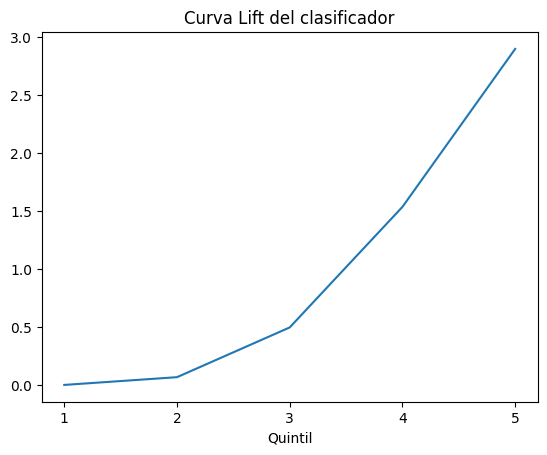

In [ ]:
plt.plot(range(1,6), pivot['Lift'])
plt.xlabel('Quintil')
plt.title('Curva Lift del clasificador')
plt.xticks([1,2,3,4,5])
plt.show()